# 1. EXPERIMENT WITH DATA AND OBSERVATIONS MADE
* REG1B is mostly < 600 for stage III and IIB, IIB and III and IV (aka later cases), and TFF1 is mostly < 4000
* LYVE1 tends to be <= 10 REG1B mostly in range < 600
* Less than half of patients have a safe amount of CA19-9 (0-37)
* LYVE1 -> important factor. LYVE1 is decently correlated with diagnosis. high concentration of 0-15 for stages IIB, III, IV.
* If TFF1 > 2000 there's a decent chance the cancer has reached stage II and above. TFF1 is decently correlated with LYVE1 and REG1B
* REG1A is not that important for diagnosis. One of the goals was to assess REG1A vs REG1B -> 0-200 REG1B and < 4000 REG1A most common, and suprisingly REG1B is closer related to TFF1 (probably due to the 306 vs 590 staple, but when you fill it w/ the median it is even less correlated at 0.30)
* Longer LYVE1, REG1B, TFF1 (stage 1 and 2 almost have identical range) correlates with more severe stages of pancreatic cancer
* Lots of different benign_sample_diagnosis, but some are quite similar -> collapse them (Pancreatitis, Gallstones, etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
pip install opendatasets


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install legacy-cgi

Note: you may need to restart the kernel to use updated packages.


In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer")
od.download("https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer/data")

Skipping, found downloaded files in ".\urinary-biomarkers-for-pancreatic-cancer" (use force=True to force download)
Skipping, found downloaded files in ".\urinary-biomarkers-for-pancreatic-cancer" (use force=True to force download)


In [5]:
from pathlib import Path

In [6]:
data_dir = Path("")

In [7]:
csv_path = data_dir / "urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv"

In [8]:
diagnosis_cancer = pd.read_csv(csv_path)
diagnosis_cancer

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [9]:
import seaborn as sns

%matplotlib inline

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.DataFrame(diagnosis_cancer)
columns_with_nulls = df.columns[df.isnull().any()]
print("Columns with null values: ", columns_with_nulls.tolist())

Columns with null values:  ['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']


<Axes: xlabel='stage'>

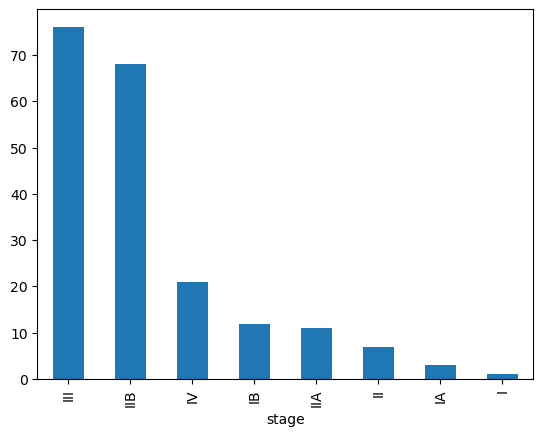

In [12]:
diagnosis_cancer["stage"].value_counts()
diagnosis_cancer["stage"].value_counts().plot(kind="bar")


## 1. Most are in stage III and IIB 

In [13]:
diagnosis_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [14]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [15]:
diagnosis_cancer["REG1A"].value_counts()

REG1A
0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: count, Length: 298, dtype: int64

In [16]:
diagnosis_cancer["plasma_CA19_9"].value_counts()

plasma_CA19_9
11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: count, Length: 266, dtype: int64

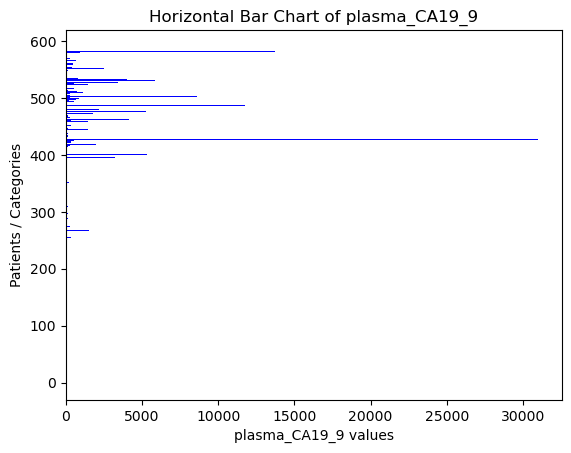

In [17]:
values = diagnosis_cancer["plasma_CA19_9"]

# Get the index (for y-axis) and values (for x-axis)
y_labels = values.index
x_values = values.values  # this is a NumPy array of float64

plt.barh(y_labels, x_values, color='blue')
plt.xlabel('plasma_CA19_9 values')
plt.ylabel('Patients / Categories')
plt.title('Horizontal Bar Chart of plasma_CA19_9')
plt.show()

In [18]:
diagnosis_cancer.columns

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [19]:
diagnosis_cancer['plasma_CA19_9'].value_counts() #Note: wide varieties of plasma_CA19_9
result = diagnosis_cancer[diagnosis_cancer['plasma_CA19_9'] < 37]['plasma_CA19_9'].value_counts()
print(result)

plasma_CA19_9
9.000000     8
11.000000    8
7.000000     6
4.000000     5
10.000000    5
            ..
0.714098     1
0.830310     1
0.051565     1
0.813539     1
19.160000    1
Name: count, Length: 119, dtype: int64


In [20]:
mask_nan = diagnosis_cancer["stage"].isna()
nan_indices = df.index[mask_nan]

# First 190 NaN rows → "III"
df.loc[nan_indices[:190], "stage"] = "IIB"

# The rest → "IIB"
df.loc[nan_indices[190:], "stage"] = "III"

<Axes: xlabel='stage'>

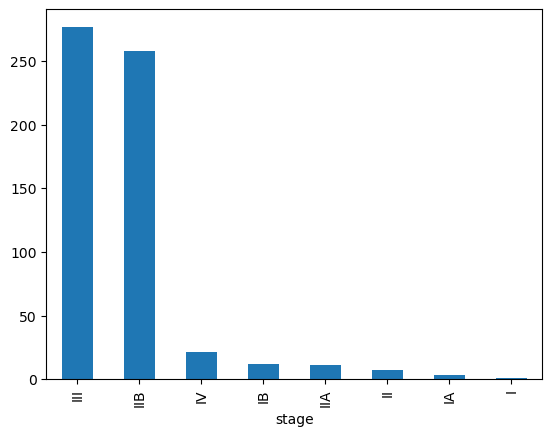

In [21]:
diagnosis_cancer["stage"].value_counts()
diagnosis_cancer["stage"].value_counts().plot(kind="bar")

In [22]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

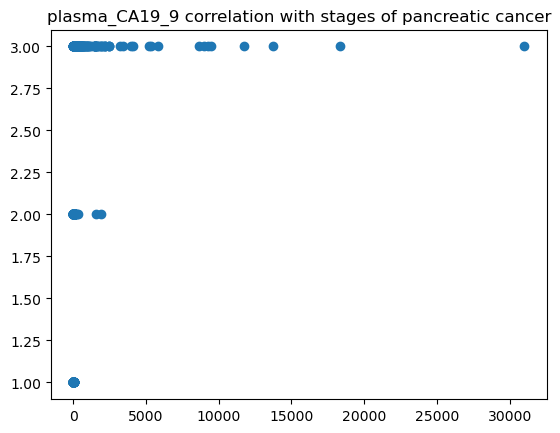

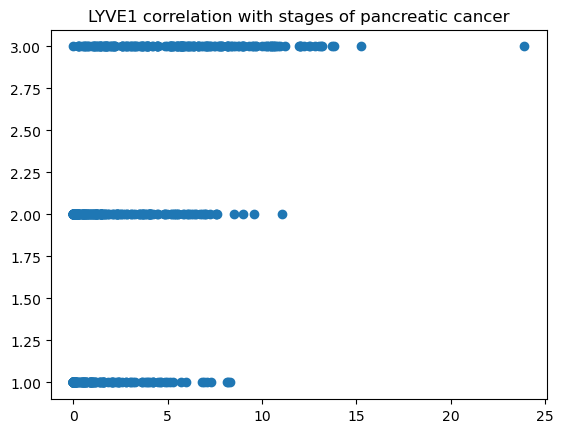

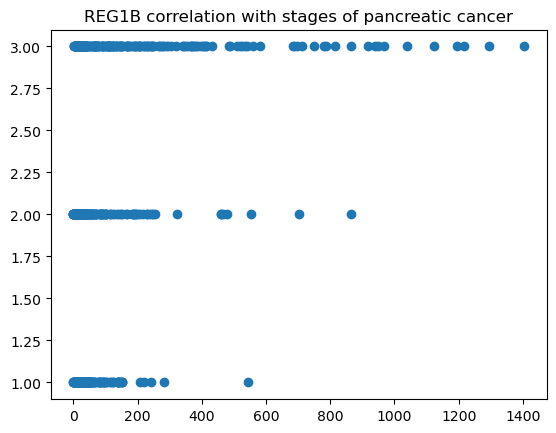

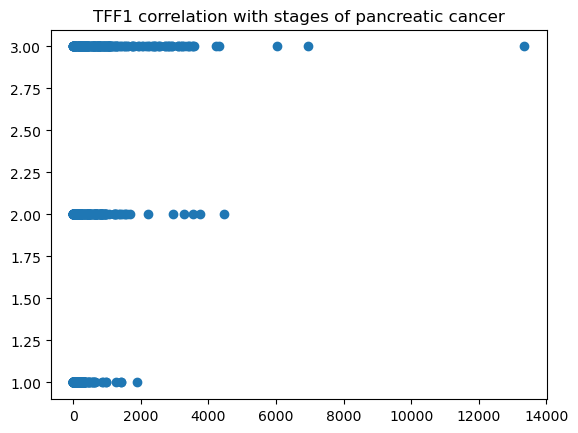

In [23]:
def draw_correlation(col):
    for cols in col:
        fig, ax = plt.subplots()
        ax.scatter(diagnosis_cancer[cols], diagnosis_cancer["diagnosis"])
        ax.set_title(f"{cols} correlation with stages of pancreatic cancer")

col = ['plasma_CA19_9', 'LYVE1', 'REG1B', 'TFF1']
draw_correlation(col)

In [24]:
diagnosis_cancer.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [25]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [26]:
def function_heatmap():
    df_corr = diagnosis_cancer.copy()
    df_corr["stage"] = df_corr["stage"].astype("category").cat.codes
    df_corr["patient_cohort"] = df_corr["patient_cohort"].astype("category").cat.codes
    df_corr["sex"] = df_corr["sex"].astype("category").cat.codes
    df_corr["benign_sample_diagnosis"] = df_corr["benign_sample_diagnosis"].astype("category").cat.codes

    df_corr = df_corr.drop(columns=["sample_id"])

    fig, ax = plt.subplots(figsize=(14, 14))
    numeric_df = df_corr.select_dtypes(include="number")
    
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.show()

In [27]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [28]:
diagnosis_cancer["REG1A"].isna().sum()

np.int64(284)

In [29]:
diagnosis_cancer[diagnosis_cancer["REG1A"] < 1000]["REG1A"].count()
#high distribution

np.int64(247)

In [30]:
diagnosis_cancer[diagnosis_cancer["REG1B"] < 1000]["REG1B"] #also it's because the range is smaller, most of the values are < 100, and all but 6 are below 1000
#high distribution

0       52.948840
1       94.467030
2      102.366000
3       60.579000
4       65.540000
          ...    
585    156.241000
586     16.915000
587    289.701000
588    205.930000
589    411.938275
Name: REG1B, Length: 584, dtype: float64

In [31]:
df["REG1A"].fillna(df["REG1B"].mean(), inplace=True)
#high distribution, fill it with median

C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\4061549840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["REG1A"].fillna(df["REG1B"].mean(), inplace=True)


In [32]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

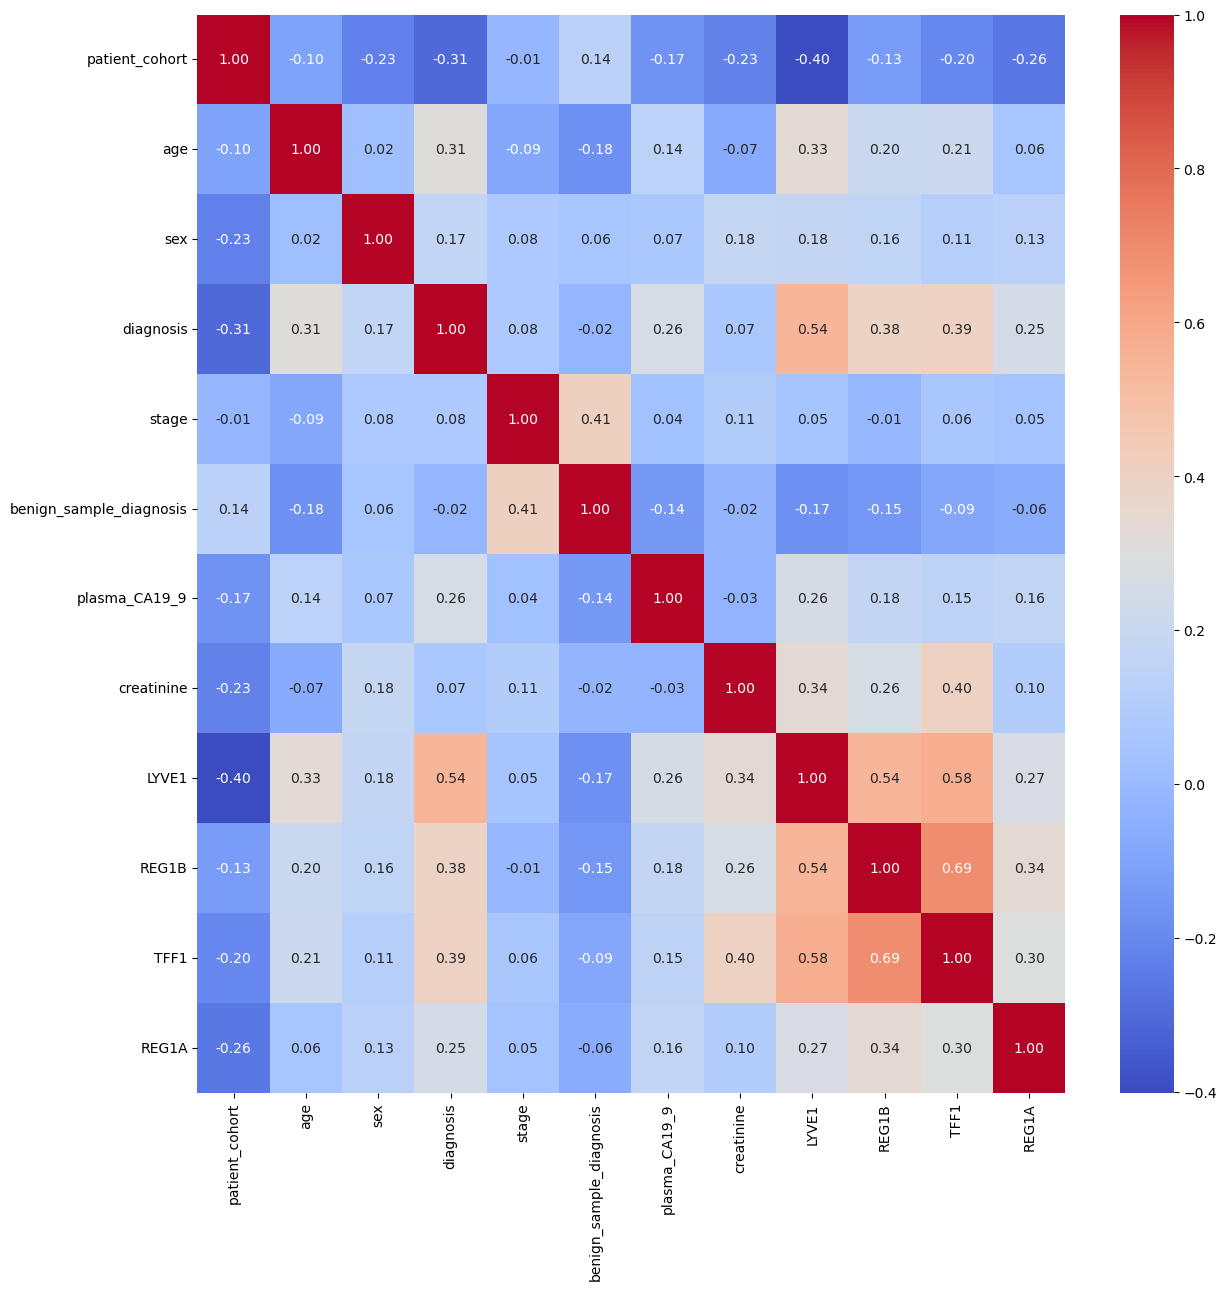

In [33]:
function_heatmap()

In [34]:
df["LYVE1"]

0      0.893219
1      2.037585
2      0.145589
3      0.002805
4      0.000860
         ...   
585    7.058209
586    8.341207
587    7.674707
588    8.206777
589    8.200958
Name: LYVE1, Length: 590, dtype: float64

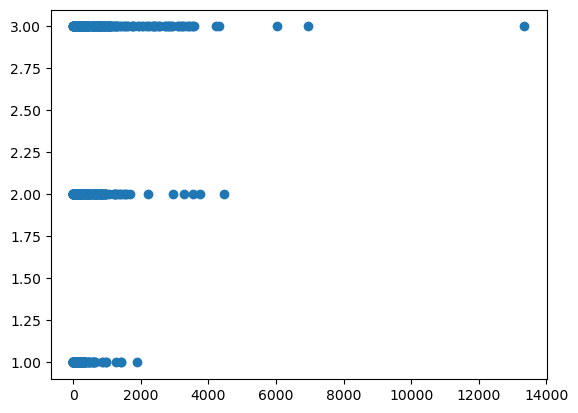

In [35]:
fig, ax = plt.subplots()
ax.scatter(diagnosis_cancer["TFF1"], diagnosis_cancer["diagnosis"])

In [36]:
df[df["plasma_CA19_9"] > 50]["plasma_CA19_9"] #over 10% are > 1000 -> median probably makes most sense
df["plasma_CA19_9"].fillna(df["plasma_CA19_9"].median(), inplace=True)
#high distribution, fill it with median

C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\3314336399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["plasma_CA19_9"].fillna(df["plasma_CA19_9"].median(), inplace=True)


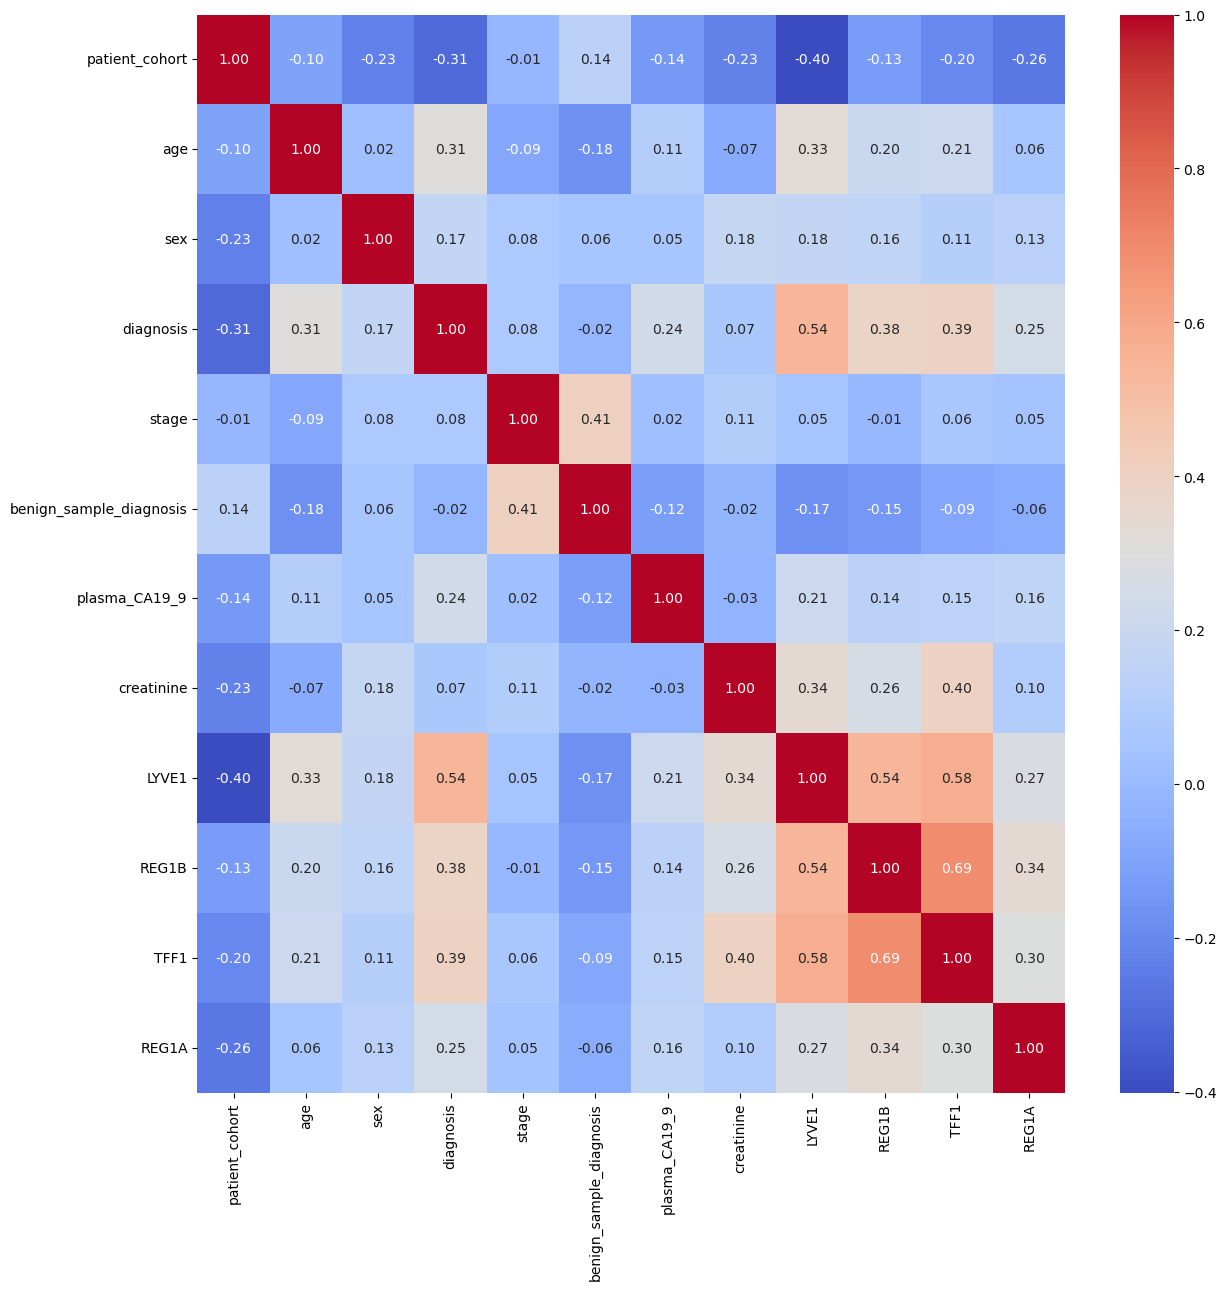

In [37]:
function_heatmap()

In [38]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

In [39]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

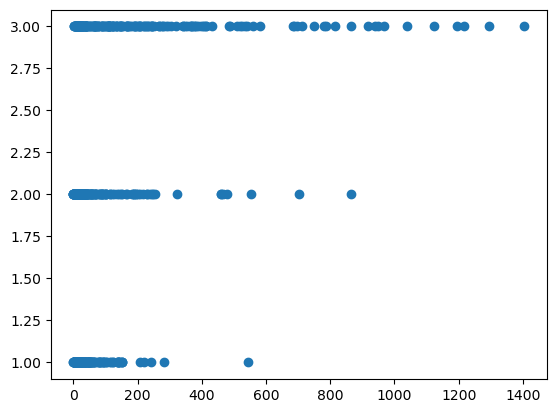

In [40]:
fig, ax = plt.subplots()
ax.scatter(diagnosis_cancer["REG1B"], diagnosis_cancer["diagnosis"])

In [41]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

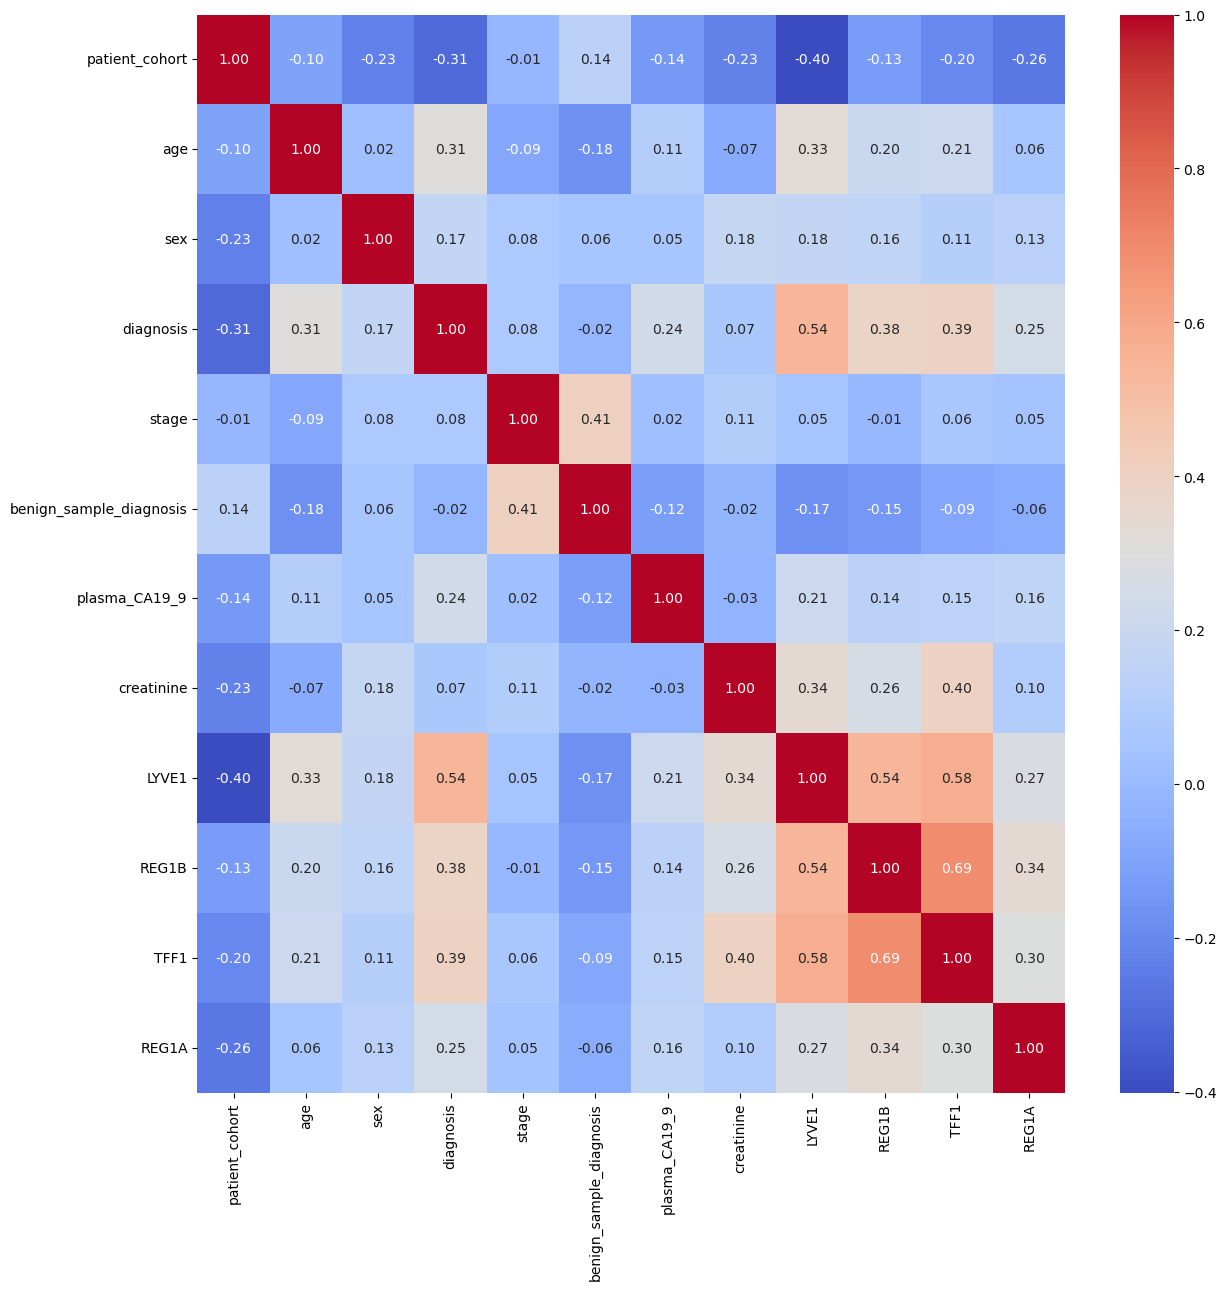

In [42]:
function_heatmap()

In [43]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

In [44]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

# 1.5. Reimport data because there was an error

In [45]:
csv_path = data_dir / "urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv"
df = pd.read_csv(csv_path)
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [46]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [47]:
#diagnosis_cancer[diagnosis_cancer["REG1B"] < 1000]["REG1B"]'benign_sample_diagnosis']
#df[df["benign_sample_diagnosis"] == "Pancreatitis"]
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

## Cleanup

In [48]:
# for stage
mask_nan = df["stage"].isna()
nan_indices = df.index[mask_nan]
df.loc[nan_indices[:190], "stage"] = "IIB"
df.loc[nan_indices[190:], "stage"] = "III"

In [49]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [50]:
df[df["plasma_CA19_9"] > 50]["plasma_CA19_9"] #over 10% are > 1000 -> median probably makes most sense
df["plasma_CA19_9"].fillna(df["plasma_CA19_9"].median(), inplace=True)
#high distribution, fill it with median

C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\3314336399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["plasma_CA19_9"].fillna(df["plasma_CA19_9"].median(), inplace=True)


In [51]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [52]:
df["REG1A"].fillna(df["REG1B"].mean(), inplace=True)
#high distribution, fill it with median

C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\4061549840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["REG1A"].fillna(df["REG1B"].mean(), inplace=True)


In [53]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

In [54]:
df['benign_sample_diagnosis'].value_counts()
#There are quite a few similar ones -> collapse them into 3/4 different categories only

benign_sample_diagnosis
Pancreatitis                                                    41
Pancreatitis (Chronic)                                          35
Gallstones                                                      21
Pancreatitis (Alcohol-Chronic)                                  11
Cholecystitis                                                    9
Serous cystadenoma - NOS                                         7
Choledocholiathiasis                                             6
Abdominal Pain                                                   6
Pancreatitis (Idiopathic)                                        4
Pancreatitis (Alcohol-Chronic-Pseuodcyst)                        4
Pancreatitis (Gallstone)                                         4
Pancreatitis (Pseudocyst)                                        4
Premalignant lesions-Mucinous cystadenoma-NOS                    3
Pancreatitis (Autoimmune)                                        3
Serous microcystic adenoma            

In [55]:
mask_items = df[df["benign_sample_diagnosis"] == 'Pancreatitis']['sample_id']
mask_items

251    S184
252    S185
253    S186
254    S187
255    S188
256    S189
257    S190
258    S191
259    S192
260    S193
261    S194
262    S195
263    S196
264    S197
265    S198
266    S199
267    S200
268    S201
269    S202
270    S203
271    S204
272    S205
273    S206
274    S207
275    S208
276    S209
277    S210
278    S211
279    S212
280    S213
281    S214
282    S215
283    S216
284    S217
285    S218
286    S219
287    S220
288    S221
289    S222
290    S285
291    S340
Name: sample_id, dtype: object

In [56]:
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,IIB,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.00000
1,S10,Cohort1,BPTB,81,F,1,IIB,NaN,26.5,0.97266,2.037585,94.467030,209.488250,228.40700
2,S100,Cohort2,BPTB,51,M,1,IIB,NaN,7.0,0.78039,0.145589,102.366000,461.141000,111.77409
3,S101,Cohort2,BPTB,61,M,1,IIB,NaN,8.0,0.70122,0.002805,60.579000,142.950000,111.77409
4,S102,Cohort2,BPTB,62,M,1,IIB,NaN,9.0,0.21489,0.000860,65.540000,41.088000,111.77409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,26.5,0.52026,7.058209,156.241000,525.178000,111.77409
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,26.5,0.85956,8.341207,16.915000,245.947000,111.77409
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,26.5,1.36851,7.674707,289.701000,537.286000,111.77409
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,26.5,1.33458,8.206777,205.930000,722.523000,111.77409


In [57]:
#df["REG1A"].fillna(df["REG1B"].mean(), inplace=True)

df['benign_sample_diagnosis'] = df['benign_sample_diagnosis'].astype(str)

# 1. Pancreatitis
mask_pancreatitis = df["benign_sample_diagnosis"].str.contains('Pancreatitis', na=False)
df.loc[mask_pancreatitis, "benign_sample_diagnosis"] = 'Pancreatitis'

# 2. Gallstones
mask_gallstones = df["benign_sample_diagnosis"].str.contains('Gallstones', na=False)
df.loc[mask_gallstones, "benign_sample_diagnosis"] = 'Gallstones'

# 3. Cholecystitis
mask_cholecystitis = df["benign_sample_diagnosis"].str.contains('Cholecystitis', na=False)
df.loc[mask_cholecystitis, "benign_sample_diagnosis"] = 'Cholecystitis'

# 4. Cholelithiasis / Choledocholithiasis
mask_cholelithiasis = (df["benign_sample_diagnosis"].str.contains('Cholelithiasis', na=False) |
                       df["benign_sample_diagnosis"].str.contains('Choledo', na=False))
df.loc[mask_cholelithiasis, "benign_sample_diagnosis"] = 'Cholelithiasis'

#5. Premaligant


df['benign_sample_diagnosis'] = df['benign_sample_diagnosis'].replace(
    to_replace=['nan', 'NaN', 'NA', 'N/A', 'NULL'],
    value=np.nan
)

mask_premalignant = df["benign_sample_diagnosis"].str.contains('Premalignant', na=False)
df.loc[mask_premalignant, "benign_sample_diagnosis"] = 'Premalignant'

df["benign_sample_diagnosis"] = df["benign_sample_diagnosis"].fillna('Pancreatitis')

In [58]:
df[df['benign_sample_diagnosis'] == 'Cholecystitis']

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
190,S329,Cohort2,BPTB,61,F,2,III,Cholecystitis,26.5,0.33930,0.136100,20.006,41.578000,111.77409
191,S260,Cohort2,BPTB,55,F,2,III,Cholecystitis,26.5,0.67860,0.604511,11.941,72.624000,111.77409
192,S261,Cohort2,BPTB,74,F,2,III,Cholecystitis,26.5,0.75777,0.222569,18.828,133.222000,111.77409
193,S263,Cohort2,BPTB,71,F,2,III,Cholecystitis,26.5,1.36851,0.728665,14.704,200.093000,111.77409
194,S274,Cohort2,BPTB,52,F,2,III,Cholecystitis,26.5,0.19227,0.127130,36.126,7.562000,111.77409
195,S275,Cohort2,BPTB,37,F,2,III,Cholecystitis,9.0,0.97266,3.669337,45.618,179.403000,111.77409
196,S280,Cohort2,BPTB,41,F,2,III,Cholecystitis,26.5,1.16493,0.718782,4.919,8.043000,111.77409
197,S282,Cohort2,BPTB,60,F,2,III,Cholecystitis,26.5,0.57681,0.002307,1.268,0.044991,111.77409
198,S321,Cohort2,BPTB,46,M,2,III,Cholecystitis,11.0,0.61074,0.613492,59.099,8.043000,111.77409
199,S323,Cohort2,BPTB,29,F,2,III,Cholecystitis,26.5,0.12441,0.000498,0.201,11.541000,111.77409


In [59]:
df.isna().sum()

sample_id                  0
patient_cohort             0
sample_origin              0
age                        0
sex                        0
diagnosis                  0
stage                      0
benign_sample_diagnosis    0
plasma_CA19_9              0
creatinine                 0
LYVE1                      0
REG1B                      0
TFF1                       0
REG1A                      0
dtype: int64

In [60]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [61]:
def function_heatmap():
    df_corr = df.copy()
    df_corr["stage"] = df_corr["stage"].astype("category").cat.codes
    df_corr["patient_cohort"] = df_corr["patient_cohort"].astype("category").cat.codes
    df_corr["sex"] = df_corr["sex"].astype("category").cat.codes
    df_corr["benign_sample_diagnosis"] = df_corr["benign_sample_diagnosis"].astype("category").cat.codes

    df_corr = df_corr.drop(columns=["sample_id", "sample_origin"])

    fig, ax = plt.subplots(figsize=(12, 12))
    numeric_df = df_corr.select_dtypes(include="number")
    
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.show()

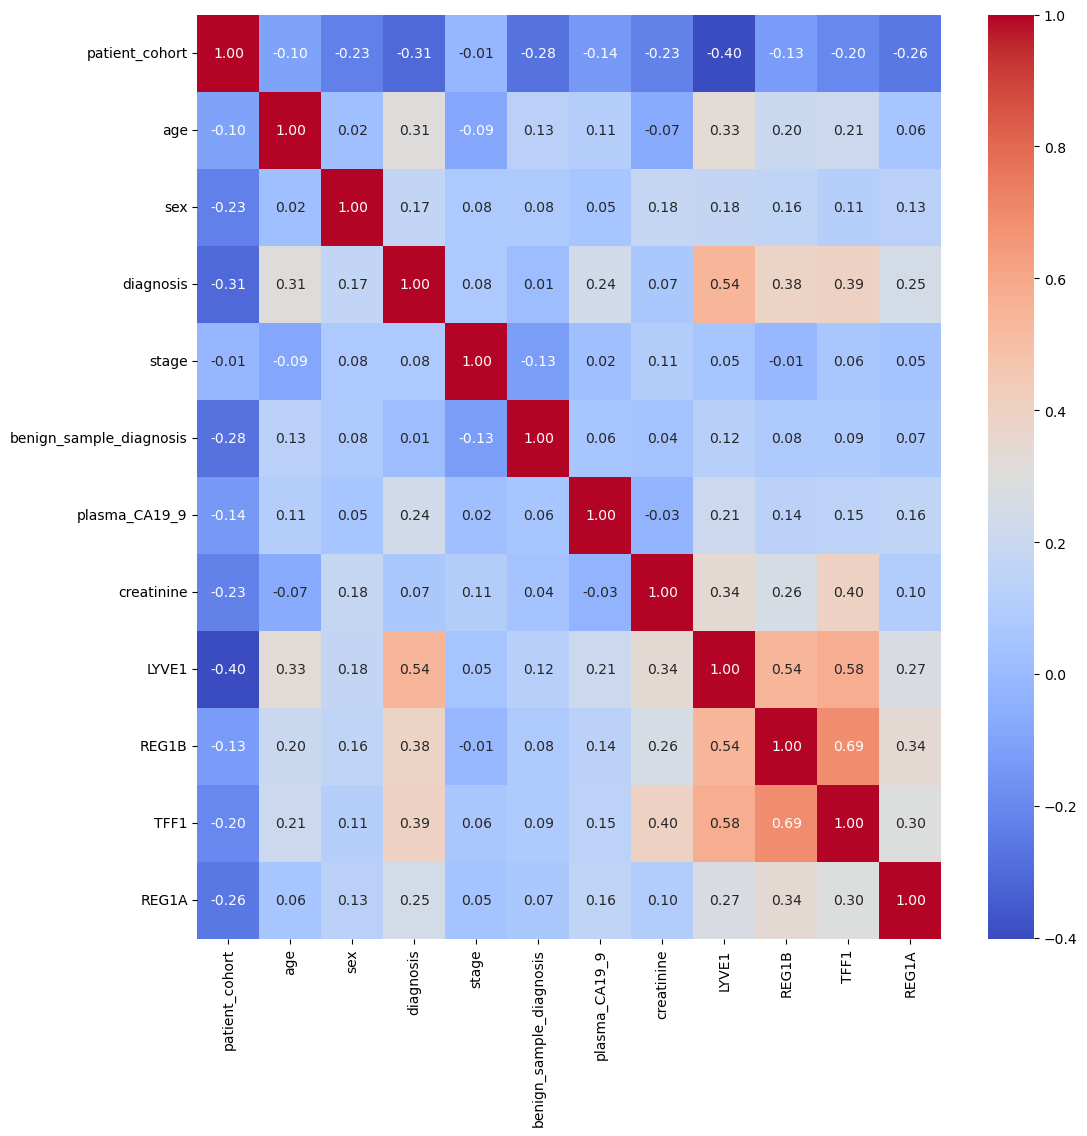

In [62]:
function_heatmap()

# 2. Training the model
# Models used: RandomForestClassifer, GradientBoosting, XGBoost, LightGBM

In [63]:
#1. RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [64]:
from xgboost import XGBClassifier

In [65]:
from lightgbm import LGBMClassifier

In [66]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [67]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [68]:
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,IIB,Pancreatitis,11.7,1.83222,0.893219,52.948840,654.282174,1262.00000
1,S10,Cohort1,BPTB,81,F,1,IIB,Pancreatitis,26.5,0.97266,2.037585,94.467030,209.488250,228.40700
2,S100,Cohort2,BPTB,51,M,1,IIB,Pancreatitis,7.0,0.78039,0.145589,102.366000,461.141000,111.77409
3,S101,Cohort2,BPTB,61,M,1,IIB,Pancreatitis,8.0,0.70122,0.002805,60.579000,142.950000,111.77409
4,S102,Cohort2,BPTB,62,M,1,IIB,Pancreatitis,9.0,0.21489,0.000860,65.540000,41.088000,111.77409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,Pancreatitis,26.5,0.52026,7.058209,156.241000,525.178000,111.77409
586,S558,Cohort2,BPTB,71,F,3,IV,Pancreatitis,26.5,0.85956,8.341207,16.915000,245.947000,111.77409
587,S560,Cohort2,BPTB,63,M,3,IV,Pancreatitis,26.5,1.36851,7.674707,289.701000,537.286000,111.77409
588,S583,Cohort2,BPTB,75,F,3,IV,Pancreatitis,26.5,1.33458,8.206777,205.930000,722.523000,111.77409


In [69]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

sample_id
patient_cohort
sample_origin
sex
stage
benign_sample_diagnosis


In [70]:
stages = {
    'I': 1, 'IA': 1, 'IB':1,
    'II':2, 'IIA': 2, 'IIB': 2,
    'III': 3, 'IV': 4
}
df['stage'] = df['stage'].map(stages)

df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,2,Pancreatitis,11.7,1.83222,0.893219,52.948840,654.282174,1262.00000
1,S10,Cohort1,BPTB,81,F,1,2,Pancreatitis,26.5,0.97266,2.037585,94.467030,209.488250,228.40700
2,S100,Cohort2,BPTB,51,M,1,2,Pancreatitis,7.0,0.78039,0.145589,102.366000,461.141000,111.77409
3,S101,Cohort2,BPTB,61,M,1,2,Pancreatitis,8.0,0.70122,0.002805,60.579000,142.950000,111.77409
4,S102,Cohort2,BPTB,62,M,1,2,Pancreatitis,9.0,0.21489,0.000860,65.540000,41.088000,111.77409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,4,Pancreatitis,26.5,0.52026,7.058209,156.241000,525.178000,111.77409
586,S558,Cohort2,BPTB,71,F,3,4,Pancreatitis,26.5,0.85956,8.341207,16.915000,245.947000,111.77409
587,S560,Cohort2,BPTB,63,M,3,4,Pancreatitis,26.5,1.36851,7.674707,289.701000,537.286000,111.77409
588,S583,Cohort2,BPTB,75,F,3,4,Pancreatitis,26.5,1.33458,8.206777,205.930000,722.523000,111.77409


In [71]:
df['benign_sample_diagnosis'].value_counts()

benign_sample_diagnosis
Pancreatitis                                   501
Gallstones                                      26
Cholecystitis                                   16
Premalignant                                    10
Cholelithiasis                                   9
Serous cystadenoma - NOS                         7
Abdominal Pain                                   6
Serous microcystic adenoma                       3
Gallbladder polyps                               2
Biliary Stricture (Secondary to Stent)           1
Ischaemic Common Bile Duct Stricture             1
Pancreato-jejunostomy Anastomoses Stricture      1
Gastritis                                        1
Ill defined lesion in uncinate process           1
Gastritis and Reflux                             1
Gallbladder Porcelain                            1
Duodenitis                                       1
Duodenal Stricture                               1
Simple benign liver cyst                         1
Name: c

In [72]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                        int64
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [73]:
print(df.columns)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['patient_cohort', 'sample_origin', 'sex', 'benign_sample_diagnosis']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

df['diagnosis'] = df['diagnosis'] - 1
X = df.drop(['sample_id', 'diagnosis'], axis=1)
y = df['diagnosis']

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')


In [74]:
X

,age,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,...,benign_sample_diagnosis_Gastritis,benign_sample_diagnosis_Gastritis and Reflux,benign_sample_diagnosis_Ill defined lesion in uncinate process,benign_sample_diagnosis_Ischaemic Common Bile Duct Stricture,benign_sample_diagnosis_Pancreatitis,benign_sample_diagnosis_Pancreato-jejunostomy Anastomoses Stricture,benign_sample_diagnosis_Premalignant,benign_sample_diagnosis_Serous cystadenoma - NOS,benign_sample_diagnosis_Serous microcystic adenoma,benign_sample_diagnosis_Simple benign liver cyst
0,33,2,11.7,1.83222,0.893219,52.948840,654.282174,1262.00000,False,False,...,False,False,False,False,True,False,False,False,False,False
1,81,2,26.5,0.97266,2.037585,94.467030,209.488250,228.40700,False,False,...,False,False,False,False,True,False,False,False,False,False
2,51,2,7.0,0.78039,0.145589,102.366000,461.141000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
3,61,2,8.0,0.70122,0.002805,60.579000,142.950000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
4,62,2,9.0,0.21489,0.000860,65.540000,41.088000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,68,4,26.5,0.52026,7.058209,156.241000,525.178000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
586,71,4,26.5,0.85956,8.341207,16.915000,245.947000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
587,63,4,26.5,1.36851,7.674707,289.701000,537.286000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
588,75,4,26.5,1.33458,8.206777,205.930000,722.523000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False


In [75]:
y

0      0
1      0
2      0
3      0
4      0
      ..
585    2
586    2
587    2
588    2
589    2
Name: diagnosis, Length: 590, dtype: int64

In [76]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

models = {'Random Forest Classifier': RandomForestClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier(),
          'XG Boost Classifier': XGBClassifier(),
          'Light GBM Classifier': LGBMClassifier()}

In [77]:

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [78]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
print("Training Completed")
model_scores

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 11
[LightGBM] [Info] Start training from score -1.159767
[LightGBM] [Info] Start training from score -1.009485
[LightGBM] [Info] Start training from score -1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

{'Random Forest Classifier': 0.875,
 'Gradient Boosting Classifier': 0.9046610169491526,
 'XG Boost Classifier': 0.885593220338983,
 'Light GBM Classifier': 0.8601694915254238}

# Observations:
- It seems like the model has reach overfitting
- Most Effective models: Gradient Boosting Classifier, XG Boost Classifier

# 3. Training Data And Evaluation

In [79]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def evaluation(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(f" {name} Evaluation \n")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_true = y_test

        print(classification_report(y_true, y_pred, zero_division=0))
        print('\n')
        

In [80]:
evaluation(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

 Random Forest Classifier Evaluation 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       146
           1       0.88      0.90      0.89       165
           2       0.84      0.79      0.81       161

    accuracy                           0.88       472
   macro avg       0.88      0.88      0.88       472
weighted avg       0.88      0.88      0.88       472



 Gradient Boosting Classifier Evaluation 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       146
           1       0.90      0.93      0.91       165
           2       0.87      0.83      0.85       161

    accuracy                           0.90       472
   macro avg       0.90      0.90      0.90       472
weighted avg       0.90      0.90      0.90       472



 XG Boost Classifier Evaluation 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       146
         

In [81]:
df

,sample_id,age,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,...,benign_sample_diagnosis_Gastritis,benign_sample_diagnosis_Gastritis and Reflux,benign_sample_diagnosis_Ill defined lesion in uncinate process,benign_sample_diagnosis_Ischaemic Common Bile Duct Stricture,benign_sample_diagnosis_Pancreatitis,benign_sample_diagnosis_Pancreato-jejunostomy Anastomoses Stricture,benign_sample_diagnosis_Premalignant,benign_sample_diagnosis_Serous cystadenoma - NOS,benign_sample_diagnosis_Serous microcystic adenoma,benign_sample_diagnosis_Simple benign liver cyst
0,S1,33,0,2,11.7,1.83222,0.893219,52.948840,654.282174,1262.00000,...,False,False,False,False,True,False,False,False,False,False
1,S10,81,0,2,26.5,0.97266,2.037585,94.467030,209.488250,228.40700,...,False,False,False,False,True,False,False,False,False,False
2,S100,51,0,2,7.0,0.78039,0.145589,102.366000,461.141000,111.77409,...,False,False,False,False,True,False,False,False,False,False
3,S101,61,0,2,8.0,0.70122,0.002805,60.579000,142.950000,111.77409,...,False,False,False,False,True,False,False,False,False,False
4,S102,62,0,2,9.0,0.21489,0.000860,65.540000,41.088000,111.77409,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,68,2,4,26.5,0.52026,7.058209,156.241000,525.178000,111.77409,...,False,False,False,False,True,False,False,False,False,False
586,S558,71,2,4,26.5,0.85956,8.341207,16.915000,245.947000,111.77409,...,False,False,False,False,True,False,False,False,False,False
587,S560,63,2,4,26.5,1.36851,7.674707,289.701000,537.286000,111.77409,...,False,False,False,False,True,False,False,False,False,False
588,S583,75,2,4,26.5,1.33458,8.206777,205.930000,722.523000,111.77409,...,False,False,False,False,True,False,False,False,False,False


In [82]:
X

,age,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,...,benign_sample_diagnosis_Gastritis,benign_sample_diagnosis_Gastritis and Reflux,benign_sample_diagnosis_Ill defined lesion in uncinate process,benign_sample_diagnosis_Ischaemic Common Bile Duct Stricture,benign_sample_diagnosis_Pancreatitis,benign_sample_diagnosis_Pancreato-jejunostomy Anastomoses Stricture,benign_sample_diagnosis_Premalignant,benign_sample_diagnosis_Serous cystadenoma - NOS,benign_sample_diagnosis_Serous microcystic adenoma,benign_sample_diagnosis_Simple benign liver cyst
0,33,2,11.7,1.83222,0.893219,52.948840,654.282174,1262.00000,False,False,...,False,False,False,False,True,False,False,False,False,False
1,81,2,26.5,0.97266,2.037585,94.467030,209.488250,228.40700,False,False,...,False,False,False,False,True,False,False,False,False,False
2,51,2,7.0,0.78039,0.145589,102.366000,461.141000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
3,61,2,8.0,0.70122,0.002805,60.579000,142.950000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
4,62,2,9.0,0.21489,0.000860,65.540000,41.088000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,68,4,26.5,0.52026,7.058209,156.241000,525.178000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
586,71,4,26.5,0.85956,8.341207,16.915000,245.947000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
587,63,4,26.5,1.36851,7.674707,289.701000,537.286000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False
588,75,4,26.5,1.33458,8.206777,205.930000,722.523000,111.77409,True,False,...,False,False,False,False,True,False,False,False,False,False


In [83]:
#ROC AUC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# 3 classes
y_test_bin = label_binarize(y_test, classes=[0,1,2])

In [84]:
def fit_and_predict_proba(models, X_train, X_test, y_train):
    np.random.seed(42)
    model_probas = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        y_score = model.predict_proba(X_test)
        
        model_probas[name] = y_score
        
        auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='weighted')
        print(f"ROC AUC (Weighted OvR) for {name}: {auc_score:.4f}")

    return model_probas

model_probas = fit_and_predict_proba(models, X_train, X_test, y_train)
print("ROC-AUC curve completed")

ROC AUC (Weighted OvR) for Random Forest Classifier: 0.9751
ROC AUC (Weighted OvR) for Gradient Boosting Classifier: 0.9767
ROC AUC (Weighted OvR) for XG Boost Classifier: 0.9666
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 11
[LightGBM] [Info] Start training from score -1.159767
[LightGBM] [Info] Start training from score -1.009485
[LightGBM] [Info] Start training from score -1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\1077522189.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 1], [0, 1], 'k--', lw=1, color='gray', label='Chance (AUC = 0.333)')


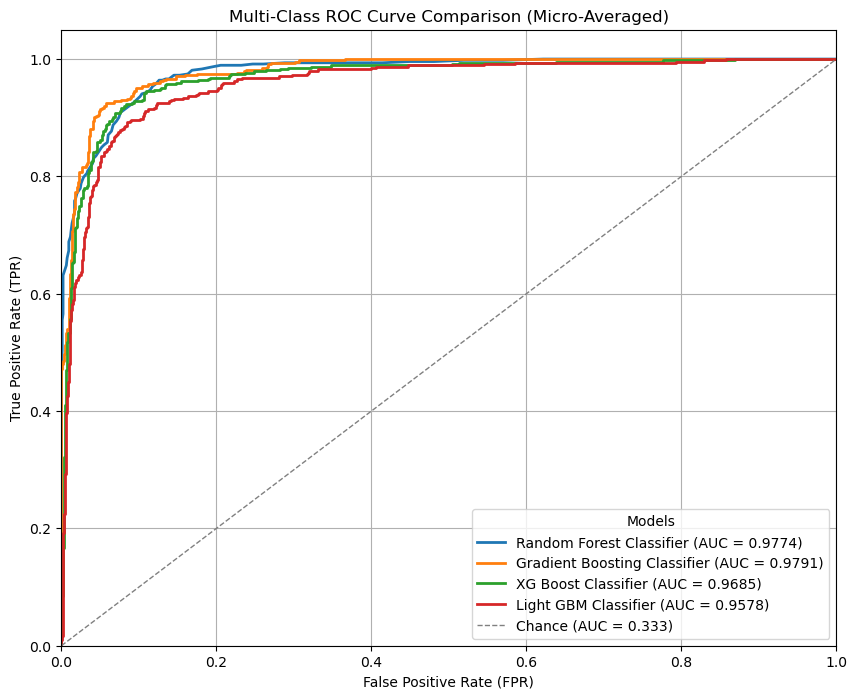

In [85]:
gb_probas = model_probas['Gradient Boosting Classifier']
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over every model and its prediction probabilities
for name, y_score in model_probas.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    # 2. Plot the model's curve with its name and AUC score in the label
    ax.plot(
        fpr,
        tpr,
        lw=2,
        # Use the 'name' from the models dictionary as the label
        label=f"{name} (AUC = {roc_auc:.4f})" 
    )

# Plot the chance line (random guessing)
ax.plot([0, 1], [0, 1], 'k--', lw=1, color='gray', label='Chance (AUC = 0.333)')

# Final plot formatting
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
ax.set_title("Multi-Class ROC Curve Comparison (Micro-Averaged)")
ax.legend(loc="lower right", title="Models")
ax.grid(True)
plt.show()

In [86]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

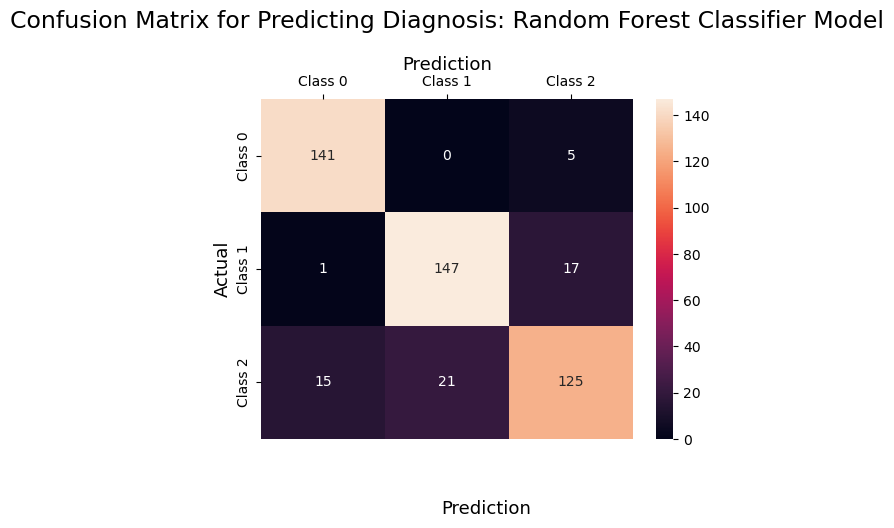

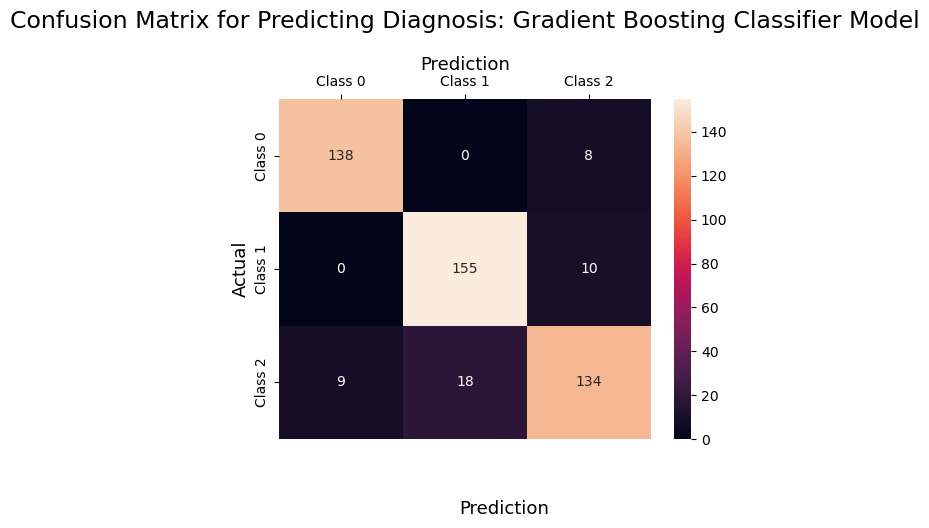

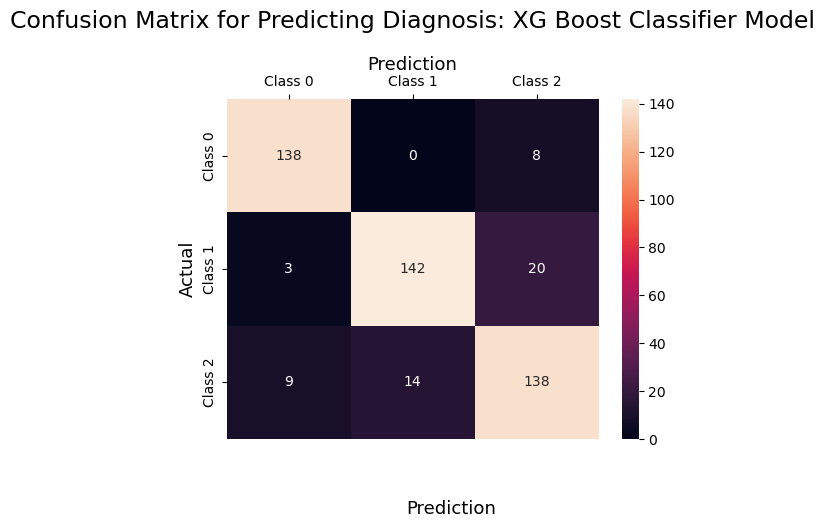

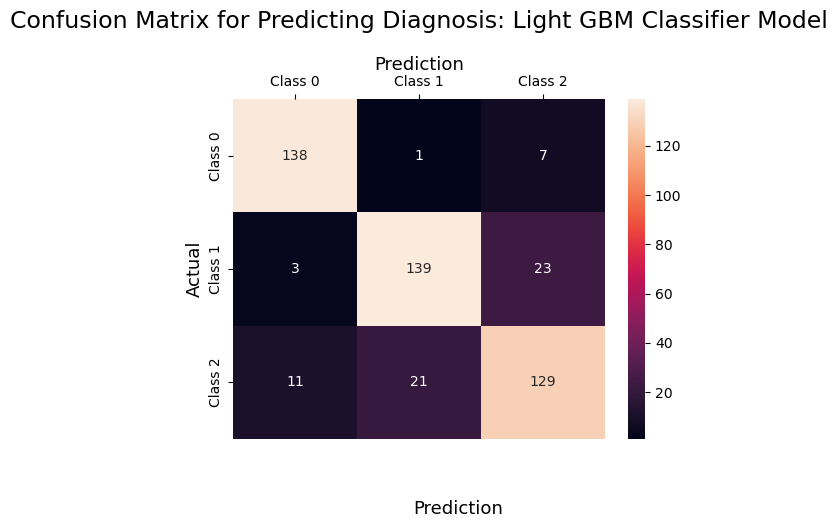

In [87]:
def heatmap_function(models, X_test, y_test):
    cm_dict = {}
    for name, model in models.items():
        actual = y_test
        predicted = model.predict(X_test)
        cm_dict[name] = confusion_matrix(actual,predicted)
    return cm_dict

cm_dict = heatmap_function(models, X_test, y_test)

for name, value in cm_dict.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(value, 
            annot=True,
            fmt='g', 
            xticklabels=['Class 0','Class 1', 'Class 2'],
            yticklabels=['Class 0','Class 1', 'Class 2'])
    plt.ylabel('Actual', fontsize=13)
    plt.title(f'Confusion Matrix for Predicting Diagnosis: {name} Model', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

In [88]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [89]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap


In [90]:
len(df.columns)

33

In [91]:
X_test

,age,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,...,benign_sample_diagnosis_Gastritis,benign_sample_diagnosis_Gastritis and Reflux,benign_sample_diagnosis_Ill defined lesion in uncinate process,benign_sample_diagnosis_Ischaemic Common Bile Duct Stricture,benign_sample_diagnosis_Pancreatitis,benign_sample_diagnosis_Pancreato-jejunostomy Anastomoses Stricture,benign_sample_diagnosis_Premalignant,benign_sample_diagnosis_Serous cystadenoma - NOS,benign_sample_diagnosis_Serous microcystic adenoma,benign_sample_diagnosis_Simple benign liver cyst
522,70,3,2114.0,1.56078,6.358314,788.087250,3210.585000,3658.17200,False,False,...,False,False,False,False,True,False,False,False,False,False
284,47,3,21.0,2.02449,5.570366,28.080227,982.911300,131.96400,False,False,...,False,False,False,False,True,False,False,False,False,False
514,77,3,9250.0,0.21489,1.712249,20.536467,232.715800,56.19000,False,False,...,False,False,False,False,True,False,False,False,False,False
331,43,3,26.5,0.90480,0.495710,52.419335,866.664053,175.55000,False,False,...,False,False,False,False,True,False,False,False,False,False
210,73,3,9.0,1.13100,4.860454,704.236000,3283.593000,111.77409,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,60,3,2204.0,1.60602,2.236909,305.035680,2805.294618,8731.00000,False,False,...,False,False,False,False,True,False,False,False,False,False
524,78,3,30.0,1.28934,7.311100,42.027692,619.047700,159.88300,False,False,...,False,False,False,False,True,False,False,False,False,False
430,77,2,33.0,0.54288,4.169582,14.657195,287.037653,28.37900,False,False,...,False,False,False,False,True,False,False,False,False,False
100,56,2,26.5,0.80301,4.242341,59.175290,886.718172,260.39900,False,False,...,False,False,False,False,True,False,False,False,False,False


In [92]:
model = XGBClassifier().fit(X_train, y_train)

# Use SHAP to explain the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


Attempting to generate final SHAP Summary Plot. Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Creating plot...


C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\2887170321.py:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)


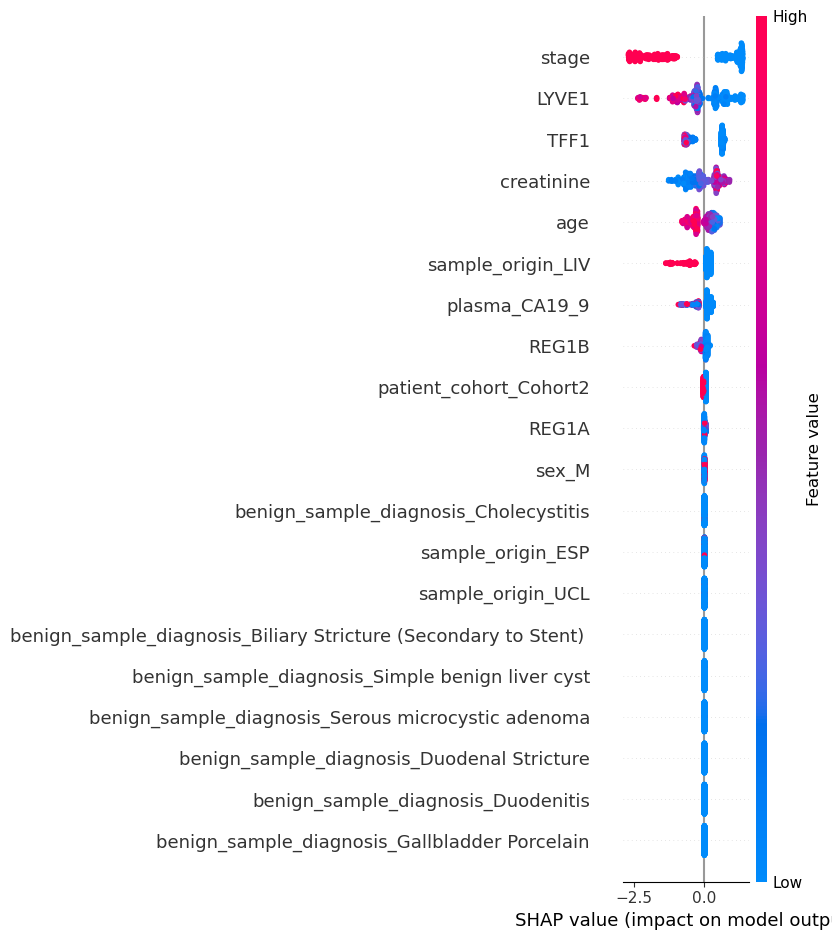

Finished plot!


In [93]:
import numpy as np

class_index = 0
num_features = 31

X_plot = X_test.drop(['diagnosis', 'sample_id'], axis=1, errors='ignore')
feature_names_list = X_plot.columns.tolist()

reshaped_shap_values = []

for sample_shap_matrix in shap_values:
        class_contributions = sample_shap_matrix[:, class_index] 
        reshaped_shap_values.append(class_contributions)

for reshaped in reshaped_shap_values:
    shap_values_for_class = np.array(reshaped_shap_values)

print(f"\nAttempting to generate final SHAP Summary Plot. Model: {model}")
print("Creating plot...")
shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)
print("Finished plot!")


Attempting to generate final SHAP Summary Plot. Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Creating plot...


C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\1248869341.py:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)


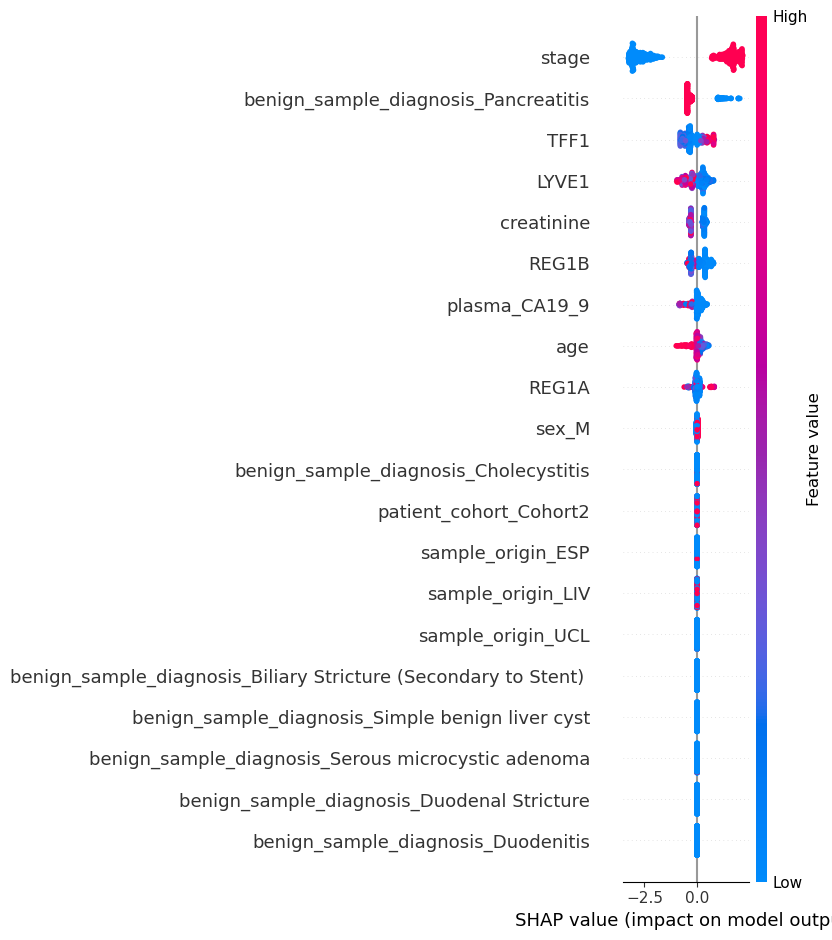

Finished plot!


In [94]:
import numpy as np

class_index = 1
num_features = 31

X_plot = X_test.drop(['diagnosis', 'sample_id'], axis=1, errors='ignore')
feature_names_list = X_plot.columns.tolist()

reshaped_shap_values = []

for sample_shap_matrix in shap_values:
        class_contributions = sample_shap_matrix[:, class_index] 
        reshaped_shap_values.append(class_contributions)

for reshaped in reshaped_shap_values:
    shap_values_for_class = np.array(reshaped_shap_values)

print(f"\nAttempting to generate final SHAP Summary Plot. Model: {model}")
print("Creating plot...")
shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)
print("Finished plot!")


Attempting to generate final SHAP Summary Plot. Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Creating plot...


C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\1638188025.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)


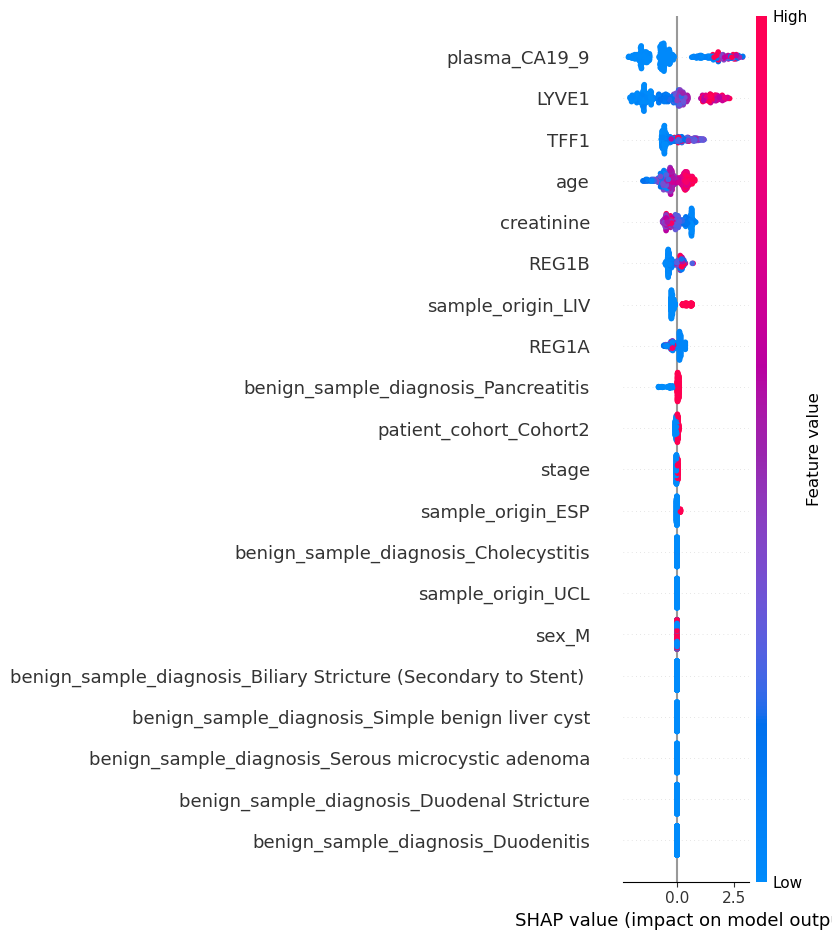

Finished plot!


In [95]:
class_index = 2
num_features = 31

X_plot = X_test.drop(['diagnosis', 'sample_id'], axis=1, errors='ignore')
feature_names_list = X_plot.columns.tolist()

reshaped_shap_values = []

for sample_shap_matrix in shap_values:
        class_contributions = sample_shap_matrix[:, class_index] 
        reshaped_shap_values.append(class_contributions)

for reshaped in reshaped_shap_values:
    shap_values_for_class = np.array(reshaped_shap_values)

print(f"\nAttempting to generate final SHAP Summary Plot. Model: {model}")
print("Creating plot...")
shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)
print("Finished plot!")

# GradientBoostingClassifier

In [96]:
model = GradientBoostingClassifier().fit(X_train, y_train)
import shap

K = 10 #Reduce to 10 for quicker computation

background_summary = shap.kmeans(X_train,K)

explainer = shap.KernelExplainer(model.predict_proba, background_summary)
shap_values = explainer.shap_values(X_test)


C:\Users\nguye\desktop\CIS4930\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  0%|          | 0/472 [00:00<?, ?it/s]


Attempting to generate final SHAP Summary Plot. Model: GradientBoostingClassifier()
Creating plot...


C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\2815284699.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)


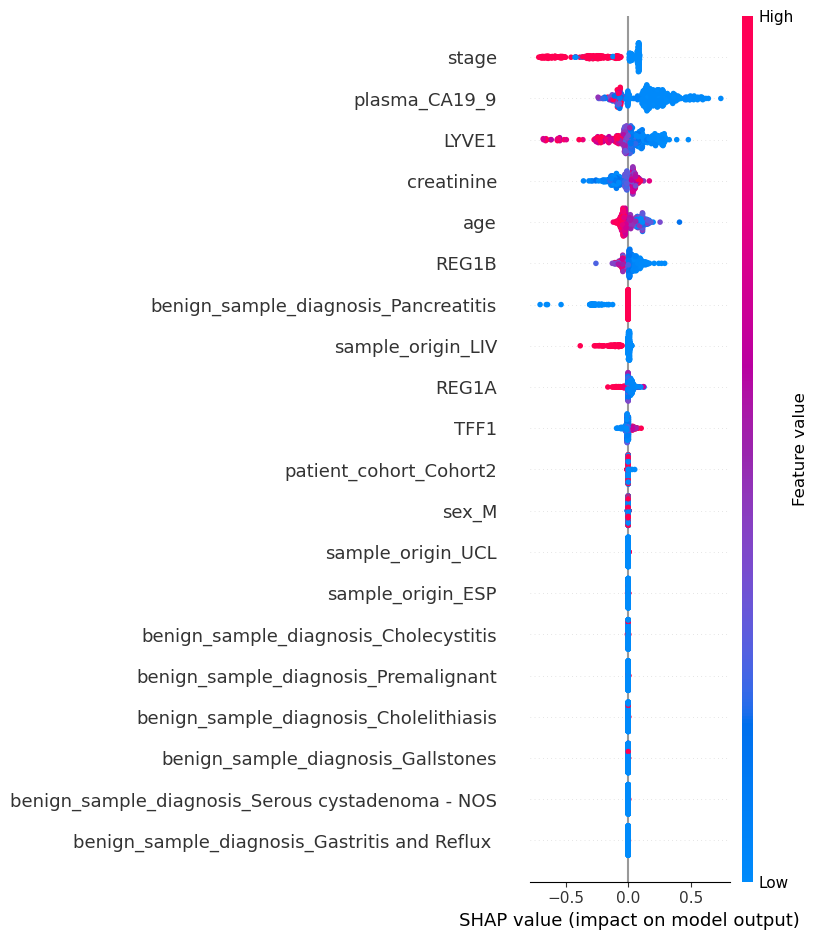

Finished plot!


In [97]:
import numpy as np

class_index = 0 
num_features = 31
X_plot = X_test.drop(['diagnosis', 'sample_id'], axis=1, errors='ignore')
feature_names_list = X_plot.columns.tolist()

reshaped_shap_values = []

for sample_shap_matrix in shap_values:
    class_contributions = sample_shap_matrix[:, class_index] 
    reshaped_shap_values.append(class_contributions)

shap_values_for_class = np.array(reshaped_shap_values)

print(f"\nAttempting to generate final SHAP Summary Plot. Model: {model}")
print("Creating plot...")
shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)
print("Finished plot!")


Attempting to generate final SHAP Summary Plot. Model: GradientBoostingClassifier()
Creating plot...


C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\2895733459.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)


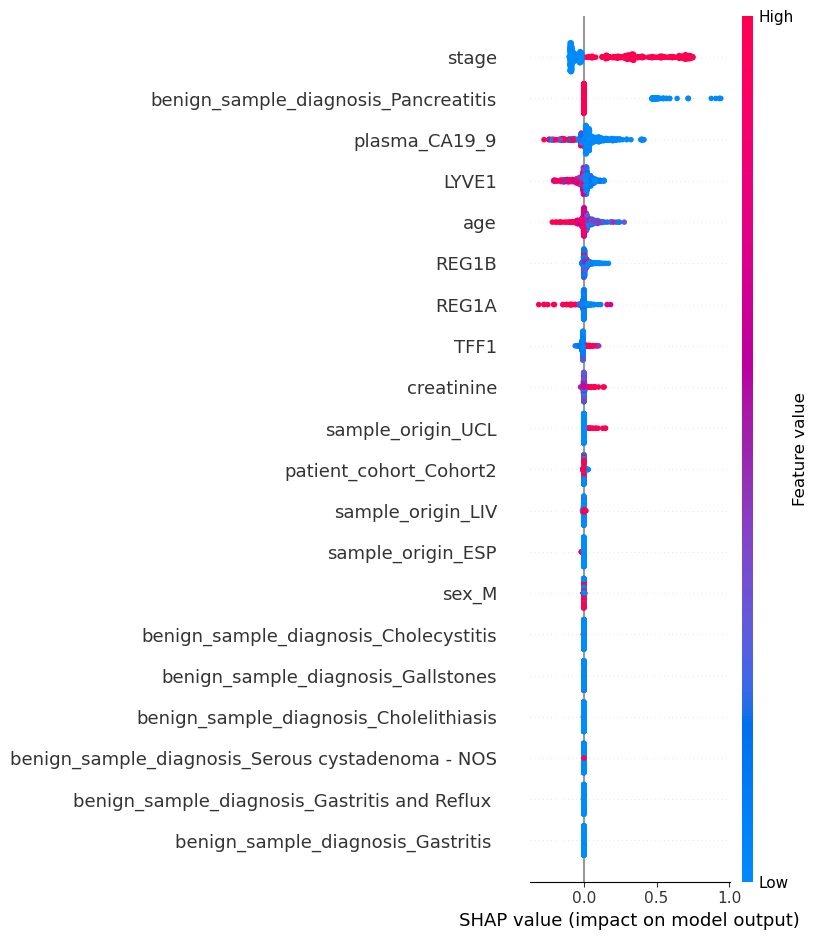

Finished plot!


In [98]:
import numpy as np

class_index = 1 
num_features = 31
X_plot = X_test.drop(['diagnosis', 'sample_id'], axis=1, errors='ignore')
feature_names_list = X_plot.columns.tolist()

reshaped_shap_values = []

for sample_shap_matrix in shap_values:
    class_contributions = sample_shap_matrix[:, class_index] 
    reshaped_shap_values.append(class_contributions)

shap_values_for_class = np.array(reshaped_shap_values)

print(f"\nAttempting to generate final SHAP Summary Plot. Model: {model}")
print("Creating plot...")
shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)
print("Finished plot!")


Attempting to generate final SHAP Summary Plot. Model: GradientBoostingClassifier()
Creating plot...


C:\Users\nguye\AppData\Local\Temp\ipykernel_33228\1166634200.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)


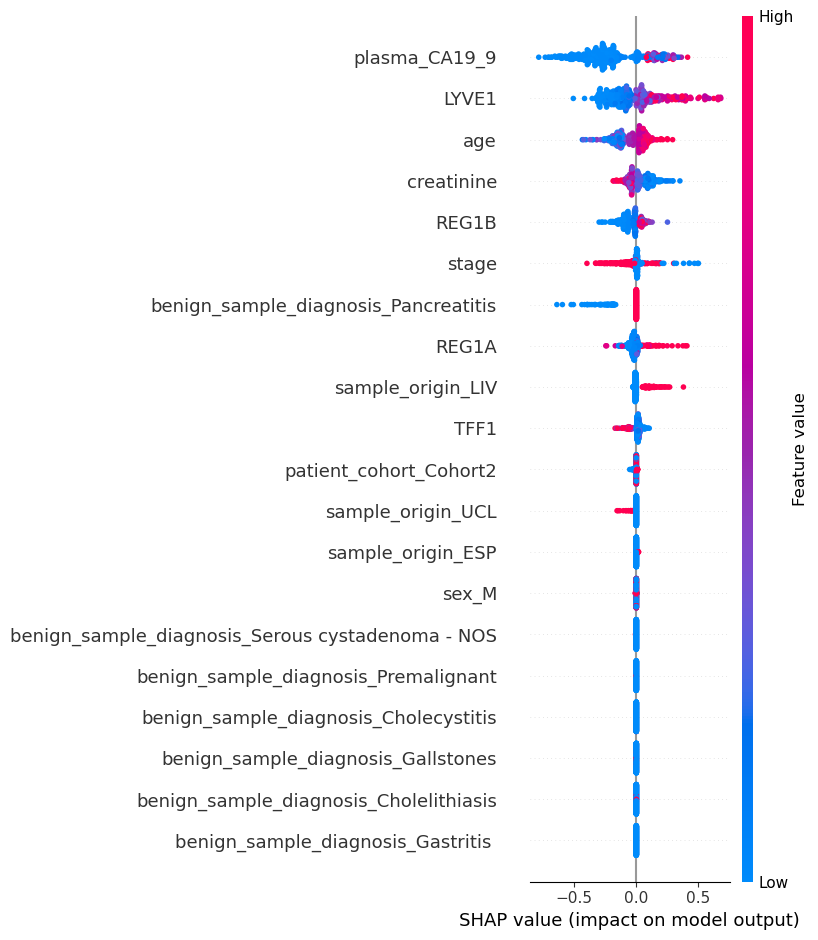

Finished plot!


In [99]:
import numpy as np

class_index = 2
num_features = 31
X_plot = X_test.drop(['diagnosis', 'sample_id'], axis=1, errors='ignore')
feature_names_list = X_plot.columns.tolist()

reshaped_shap_values = []

for sample_shap_matrix in shap_values:
    class_contributions = sample_shap_matrix[:, class_index] 
    reshaped_shap_values.append(class_contributions)

shap_values_for_class = np.array(reshaped_shap_values)

print(f"\nAttempting to generate final SHAP Summary Plot. Model: {model}")
print("Creating plot...")
shap.summary_plot(shap_values_for_class, X_plot, feature_names=feature_names_list,show=True)
print("Finished plot!")

 - LYVE1: Link domain-containing hyaladherin, a protein capable of binding to hyaluronic acid (HA), homologous to CD44, the main HA receptor has a relatively higher degree of correlation with later phrases of pancreatic cancer
 - TFF1: Also lost in gastric carcinoma, potentially establish some links https://pmc.ncbi.nlm.nih.gov/articles/PMC11475926/ (up to 55 to 95%), most likely in all cancer types
 - CA19-9: as expected, has decent correlation